In [1]:
# importing important libraries
import numpy as np
from neuralNetwork import NeuralNetwork
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils import np_utils

2022-11-13 18:29:05.183836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 18:29:05.294013: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-13 18:29:05.298379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 18:29:05.298394: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#flattening the data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

In [4]:
#flatening the data
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255

In [5]:
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
#s;iting into test and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.85, test_size = 0.15)

In [7]:
x_test.shape

(10000, 1, 784)

In [8]:
x_test[0].shape

(1, 784)

In [9]:
x_val.shape

(9000, 1, 784)

In [10]:
x_train.shape

(51000, 1, 784)

In [11]:
iterations = 10
batch_size = 100

In [12]:
# traing the model
MLP = NeuralNetwork( layers= [784, 256, 128, 64, 32, 10], acitvation= "sigmoid", initializer= "random", loss= 'L2', max_iter= iterations, alpha= 0.1, batch_size = batch_size)     # layers including input & output, actviation, wt_initializer, epochs, learning_rate
MLP.fit(x_train, y_train, x_val , y_val)

NeuralNet  epoch 1/10   learning rate = 0.100000   error/loss = 0.049083   val_loss = 0.029033
NeuralNet  epoch 2/10   learning rate = 0.100000   error/loss = 0.025288   val_loss = 0.023933
NeuralNet  epoch 3/10   learning rate = 0.100000   error/loss = 0.022021   val_loss = 0.022019
NeuralNet  epoch 4/10   learning rate = 0.100000   error/loss = 0.020416   val_loss = 0.021149
NeuralNet  epoch 5/10   learning rate = 0.100000   error/loss = 0.019334   val_loss = 0.020656
NeuralNet  epoch 6/10   learning rate = 0.100000   error/loss = 0.018497   val_loss = 0.020221
NeuralNet  epoch 7/10   learning rate = 0.100000   error/loss = 0.017798   val_loss = 0.019866
NeuralNet  epoch 8/10   learning rate = 0.100000   error/loss = 0.017198   val_loss = 0.019579
NeuralNet  epoch 9/10   learning rate = 0.100000   error/loss = 0.016669   val_loss = 0.019324
NeuralNet  epoch 10/10   learning rate = 0.100000   error/loss = 0.016196   val_loss = 0.019107


In [13]:
MLP.predict(x_test[:10])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [14]:
MLP.score(x_test, y_test)

0.8597

In [15]:
epochs = np.arange(1, iterations + 1)
train_loss = MLP.get_training_loss()
val_loss = MLP.get_validation_loss()

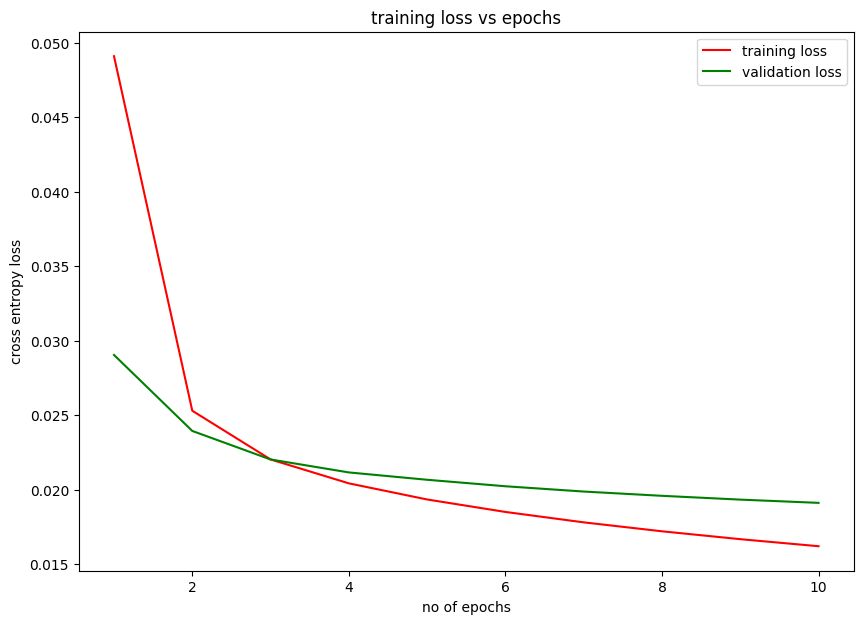

In [16]:
plt.figure(figsize=(10, 7))
plt.plot( epochs, train_loss, color = 'r', label = 'training loss')
plt.plot( epochs, val_loss, color = 'g', label = 'validation loss')
plt.xlabel('no of epochs')
plt.ylabel('cross entropy loss')
plt.title( 'training loss vs epochs')
plt.legend()
plt.show()

In [17]:
np.random.rand(5,6) - 0.5

array([[-0.07011621,  0.04868815,  0.10923539, -0.09907172, -0.13662673,
         0.45421701],
       [ 0.15280069, -0.29841971, -0.06332419, -0.32732309,  0.07526658,
        -0.00705228],
       [-0.02233129, -0.46730746, -0.20684289,  0.13838994, -0.28413835,
        -0.34871382],
       [ 0.3412957 , -0.12858513, -0.01652022,  0.05159381,  0.25861946,
         0.46105462],
       [-0.08877419, -0.2927727 ,  0.39383534,  0.36182556, -0.47357873,
         0.21310393]])

In [18]:
np.random.normal( 0 , 1, (5 ,6))           # normal 

array([[-1.61246435,  0.93495251,  1.44114669, -1.20711895,  0.14706849,
        -1.61383488],
       [-1.59464967, -2.02379059,  0.80387881, -0.38591053,  1.62524375,
        -0.0470828 ],
       [-0.83146419,  0.6258625 , -1.4140158 , -0.51227312,  0.68884486,
        -0.81075959],
       [-1.14545561,  0.23230744,  0.67224852, -0.92163194,  0.88563362,
         0.7617811 ],
       [-0.44677601, -1.53505947, -1.53266425,  0.33913931, -1.31541586,
         0.09493279]])

In [19]:
np.zeros((4,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
d = np.empty((1, 10)).astype('int')


In [21]:
d.fill(4)

In [22]:
d.shape

(1, 10)

In [23]:
d

array([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [24]:
xx = np.array([1,3,4, -2, -4])

In [25]:
xx

array([ 1,  3,  4, -2, -4])

In [26]:
xx.shape

(5,)

In [27]:
np.where(xx > -9999999, 1, 0)

array([1, 1, 1, 1, 1])